
# Exercice 2

1. Ecrire en langage Python les fonctions vues au cours :
    - Partition de Lomuto
    - Partition 2
    - Tri rapide

2. Générer aléatoirement un tableau T de taille n

3. Trier ce tableau dans un ordre croissant en utilisant le tri rapide.

4. Faire le même travail (phases 2 et 3) en variant le plus possible la taille n et en calculant la complexité en fonction de la taille n.

5. Refaire les questions 3 et 4 appliquées au tableau A dans les cas suivants :
    - A est un tableau de taille n trié dans un ordre croissant.
    - A est un tableau de taille n trié dans un ordre décroissant.
    - A est un tableau de taille n tel que tous ses éléments ont la même valeur.

6. Faire une analyse et conclusion après avoir comparé les résultats obtenus.

Before Sorting:
[13  2  4 94 60 50 95 34 13 22 38 90 25  7 41  2  3 97 81  1 68 46 96 65
 66 81  5 31 98 98 27 10 15 31 66  8 54 25 59 74 28 59 85 12 74 49 54  5
 61 20 33 69  4 85  3 37 21 11 58 12 29 67 67 82 78 59 55 14  1  2 40  8
 46 47 55 64 75  4 71 11 38 11 41 30 61 79 31 91 28 34 39 52 47]
Sorted:
[ 1  1  2  2  2  3  3  4  4  4  5  5  7  8  8 10 11 11 11 12 12 13 13 14
 15 20 21 22 25 25 27 28 28 29 30 31 31 31 33 34 34 37 38 38 39 40 41 41
 46 46 47 47 49 50 52 54 54 55 55 58 59 59 59 60 61 61 64 65 66 66 67 67
 68 69 71 74 74 75 78 79 81 81 82 85 85 90 91 94 95 96 97 98 98]
Before Sorting:
[63 27 62 29 75 19 36 60 78 94 41 59 49 72 67 75 89 94 59 94 15 27 74 56
 13 90 51 54 67 46 99 92 60 14 11 73 33 93]
Sorted:
[11 13 14 15 19 27 27 29 33 36 41 46 49 51 54 56 59 59 60 60 62 63 67 67
 72 73 74 75 75 78 89 90 92 93 94 94 94 99]
Before Sorting:
[56  9 84 83 90 68 19 21 16 57 15 63  3 58 20 92 91 46 88 97  7 20  6 88
 98 53 86 92 61 67 83  0 67 51 49 42 28 97 83 19 33 72 44 14 

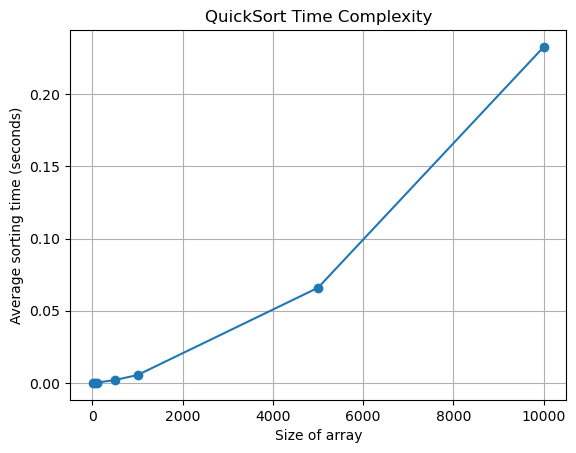

Before Sorting (Croissant):
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92]
Sorted (Croissant):
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92]
Before Sorting (Décroissant):
[93 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71 70
 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48 47 46
 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26 25 24 23 22
 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1]
Sorted (Décroissant):
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16

RecursionError: maximum recursion depth exceeded

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Question 1:

def LamutoPart(T, d, f):
    x = T[f]
    i = d - 1
    for j in range(d, f):
        if T[j] <= x:
            i += 1
            T[i], T[j] = T[j], T[i]
    T[i + 1], T[f] = T[f], T[i + 1]
    return i + 1


def Partition2(T, d, f):
    x = T[f] 
    indInf = d, indSup = f - 1
    while indInf <= indSup:
        if T[indInf] < x:
            indInf += 1
        else:
            T[indInf], T[indSup] = T[indSup], T[indInf]
            indSup -= 1
    T[indSup + 1], T[f] = T[f], T[indSup + 1]
    return indSup + 1


def quicksort(T, d, f):
    if f - d <= 0:
        return 1
    else:
        q = LamutoPart(T, d, f)
        quicksort(T, d, q - 1)
        quicksort(T, q + 1, f)

def generatetime(n):
    temp_moy = 0
    for _ in range(7):
        T = np.random.randint(0, 100, n)
        start = time.time()
        quicksort(T, 0, n - 1)
        end = time.time()
        temp_moy += end - start
    return temp_moy / 7

        
# Question 2: 

n = np.random.randint(1, 100) #90
T = np.random.randint(0, 100, n)  
print('Before Sorting:')
print(T)
quicksort(T, 0, len(T) - 1)
print("Sorted:")
print(T)

# Question 3:
n1 = np.random.randint(1, 100)
T1 = np.random.randint(0, 100, n1)
print('Before Sorting:') 
print(T1)
quicksort(T1, 0, len(T1) - 1)
print("Sorted:")
print(T1)

n2 = np.random.randint(1, 100)
T2 = np.random.randint(0, 100, n2)
print('Before Sorting:')
print(T2)
quicksort(T2, 0, len(T2) - 1)
print("Sorted:")
print(T2)


# Question 4:
sizes = [10, 50, 100, 500, 1000, 5000, 10000]
times = []

for size in sizes:
    avg_time = generatetime(size)
    times.append(avg_time)
    print(f"Size: {size}, Average Time: {avg_time:.6f} seconds")

plt.plot(sizes, times, marker='o')
plt.xlabel('Size of array')
plt.ylabel('Average sorting time (seconds)')
plt.title('QuickSort Time Complexity')
plt.grid(True)
plt.show()

# Question 5:
# Cas 1: A est un tableau de taille n trié dans un ordre croissant.
A_croissant = np.arange(n)
print('Before Sorting (Croissant):')
print(A_croissant)
quicksort(A_croissant, 0, len(A_croissant) - 1)
print("Sorted (Croissant):")
print(A_croissant)

    # Cas 2: A est un tableau de taille n trié dans un ordre décroissant.
A_decroissant = np.arange(n, 0, -1)
print('Before Sorting (Décroissant):')
print(A_decroissant)
quicksort(A_decroissant, 0, len(A_decroissant) - 1)
print("Sorted (Décroissant):")
print(A_decroissant)

# Cas 3: A est un tableau de taille n tel que tous ses éléments ont la même valeur.
A_identique = np.full(n, 7)
print('Before Sorting (Identique):')
print(A_identique)
quicksort(A_identique, 0, len(A_identique) - 1)
print("Sorted (Identique):")
print(A_identique)

    # Analyse des temps pour chaque cas
times_croissant = []
times_decroissant = []
times_identique = []

for size in sizes:
        # Croissant
    A_croissant = np.arange(size)
    start = time.time()
    quicksort(A_croissant, 0, len(A_croissant) - 1)
    end = time.time()
    times_croissant.append(end - start)

        # Décroissant
    A_decroissant = np.arange(size, 0, -1)
    print(f"le tableau croissant est : {A_decroissant}")
    start = time.time()
    quicksort(A_decroissant, 0, len(A_decroissant) - 1)
    end = time.time()
    times_decroissant.append(end - start)

        # Identique
    A_identique = np.full(size, 7)
    start = time.time()
    quicksort(A_identique, 0, len(A_identique) - 1)
    end = time.time()
    times_identique.append(end - start)

plt.plot(sizes, times_croissant, marker='o', label='Croissant')
plt.plot(sizes, times_decroissant, marker='o', label='Décroissant')
plt.plot(sizes, times_identique, marker='o', label='Identique')
plt.xlabel('Size of array')
plt.ylabel('Sorting time (seconds)')
plt.title('QuickSort Time Complexity for Different Cases')
plt.legend()
plt.grid(True)
plt.show()